# LangGraph Agentic AI Workshop by TeamVPE

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/VirtualPatientEngine/EuroSTEMPeers2025_workshop/blob/main/notebooks/AI-Agents-Workshop.ipynb)
![Python](https://img.shields.io/badge/python-3.12-blue.svg)
![LangGraph](https://img.shields.io/badge/langgraph-enabled-purple.svg)


<img src="https://avatars.githubusercontent.com/u/144795768?s=200&v=4" width="100" height="100" />


Welcome to the **Agentic AI with LangGraph** workshop by [TeamVPE](https://bmedx.com/research-teams/artificial-intelligence/team-vpe/) at [BioMed X Institute](https://bmedx.com) the research is kindly sponsored by [Sanofi](https://www.sanofi.com/en)!




In this hands-on session, we’ll **build intelligent agents step by step**, each powered by language models and tools. You'll go from a simple echo bot to a multi-tool agent that can:

### 🧠 What You’ll Learn
- How to build agents using **LangGraph** (state machines for LLMs)
- How to structure agent **state** and **tool-calling workflows**
- How to use **OpenAI** or **NVIDIA NIMs** as the language model backend
- How to visualize your LangGraph agent structure
- How to create tools for:
  - ✅ Math calculation
  - 📊 Dynamic plotting with `matplotlib`
  - 🌐 Translation
  - 📄 PDF downloading and question-answering
  - 🖼️ Image generation using DALL·E

---

### 🧱 What You’ll Build
By the end of the workshop, you will have created:
1. A **LangGraph-powered agent** that reasons and calls tools
2. A **ReAct loop** agent with intermediate memory (`intermediate_steps`)
3. A **Multi-tool agent** with dynamic tool routing
4. A **PDF QA assistant** that can download, extract, and answer from papers
5. An **image-generating agent** that creates visuals from prompts

---

### 🧰 Prerequisites
- [OpenAI](https://platform.openai.com/api-keys) or [NVIDIA API key](https://build.nvidia.com/explore/discover)
- Python 3.12+
- Jupyter Notebook environment

---

>Visit AIAgents4Pharma an open-source project by Team VPE that brings together AI-driven tools to help researchers and pharma interact seamlessly with complex biological data  
> [here](https://github.com/VirtualPatientEngine/AIAgents4Pharma).

Let’s get started with the setup 👇


## 🛠️ Step 1: Install LangGraph and LangChain

Before we can use agentic AI, we need to install two Python libraries:
- **LangGraph**: Helps us build multi-step agents with a visual flow
- **LangChain**: Makes it easy to use language models like OpenAI and NVIDIA NIM

We’ll also install `openai` to connect to OpenAI models.

Run the cell below to install them.


In [1]:
# 🛠️ Step 1: Install LangGraph and LangChain
# !pip install -q langgraph langchain openai langchain_openai matplotlib
# !pip install -qU langchain-nvidia-ai-endpoints

## 🧠 Step 2: Define the Agent's State and a Simple Echo Node

Agents pass information between steps using something called a **state** — like a shared notepad.

We define:
- `AgentState`: what our agent keeps track of (user input and output)
- `echo_agent_node`: a dummy agent that just repeats what the user said

This teaches us how LangGraph nodes work.


In [2]:
# 🧠 Step 2: Define the state and a simple agent node

from langgraph.graph import StateGraph, END
from typing import TypedDict, Annotated

# State definition (this is the data passed between nodes)
class AgentState(TypedDict):
    user_input: Annotated[str, "User input message"]
    agent_output: Annotated[str, "Agent response"]

# Simple echo agent node
def echo_agent_node(state: AgentState) -> AgentState:
    user_message = state["user_input"]
    response = f"🤖 Echo: {user_message}"
    return {
        "user_input": user_message,
        "agent_output": response,
    }


## 🧱 Step 3: Build and Run the LangGraph (Echo Agent)

Now we:
- Build a graph with one step: the echo node
- Set the flow: start → echo → end
- Run the graph by giving it a user message

The agent returns a simple response: "Echo: [your message]"

This is our first working agent!


In [3]:
# 🧱 Step 3: Build and run the LangGraph

# 1. Create the graph
builder = StateGraph(AgentState)

# 2. Add a single node: echo agent
builder.add_node("echo_agent", echo_agent_node)

# 3. Define the flow: input → echo_agent → END
builder.set_entry_point("echo_agent")
builder.set_finish_point("echo_agent")

# 4. Compile the graph
graph = builder.compile()

# 5. Run the graph on a simple input
initial_state = {"user_input": "Hello, LangGraph!"}
final_state = graph.invoke(initial_state)

# 6. Print the output
print("Agent Output:", final_state["agent_output"])


Agent Output: 🤖 Echo: Hello, LangGraph!


## 🔐 Optional Step: Paste Your API Key Manually

If you don’t want to create a `.env` file, you can paste your API key here instead.

Choose **one** of the two options:
- OpenAI API key
- NVIDIA NIM API key

Only one key is needed. This key is stored temporarily in memory (not saved to disk).


In [4]:
# 🔐 Optional: Set your API key manually (only for demo/workshop use)

# Uncomment ONE of the two lines below and paste your API key

# os.environ["OPENAI_API_KEY"] = "sk-..."
# os.environ["NVIDIA_API_KEY"] = "nvapi-..."

print("✅ API key set manually (in-memory only). You can now run the next cell.")


✅ API key set manually (in-memory only). You can now run the next cell.


## 🤖 Step 4: Load a Real Language Model (OpenAI or NVIDIA NIM)

Here we:
- Check which API key is available (OpenAI or NVIDIA)
- Load the correct language model
- Update the agent to use the model to answer the user message

Now the agent becomes intelligent — it can generate useful responses!


In [5]:
# 🤖 Step 4: Real LLM agent using OpenAI or NVIDIA NIM

import os
from langchain_core.language_models import BaseLanguageModel
from langchain_openai import ChatOpenAI

# Optional: NVIDIA NIMs support
try:
    from langchain_nvidia_ai_endpoints import ChatNVIDIA
except ImportError:
    ChatNVIDIA = None  # fallback if not installed

# Auto-detect the available API key
if os.environ.get("OPENAI_API_KEY"):
    llm: BaseLanguageModel = ChatOpenAI(model="gpt-4o-mini")
    print("✅ Using OpenAI API")
elif os.environ.get("NVIDIA_API_KEY") and ChatNVIDIA:
    llm: BaseLanguageModel = ChatNVIDIA(model="chat", temperature=0.7)
    print("✅ Using NVIDIA NIM API")
else:
    raise RuntimeError("❌ Please set either OPENAI_API_KEY or NVIDIA_API_KEY")




✅ Using OpenAI API


## 🧠 Step 5: Update the Agent Node to Use the LLM

We now replace the echo logic with a **real language model** (OpenAI or NVIDIA NIM).

This new `llm_agent_node`:
- Takes the user’s input
- Sends it to the selected LLM
- Returns the model's response as output

This turns our agent into a real conversational assistant!


In [6]:
# Updated agent node that calls the LLM
def llm_agent_node(state: AgentState) -> AgentState:
    user_message = state["user_input"]
    response = llm.invoke(user_message)
    return {
        "user_input": user_message,
        "agent_output": response.content,
    }

## 🔄 Step 5: Rebuild and Run the Graph with Real LLM Agent

We now:
- Replace the echo agent with the new LLM-powered one
- Rebuild the graph
- Send it a real message (like "What is agentic AI?")
- Print the output from the real language model

🎉 You now have a working LangGraph agent with LLM power!


In [7]:
# 🔄 Step 5: Rebuild the graph to use the real LLM agent

# 1. Build the graph with the LLM node
builder = StateGraph(AgentState)
builder.add_node("llm_agent", llm_agent_node)
builder.set_entry_point("llm_agent")
builder.set_finish_point("llm_agent")

# 2. Compile the graph
graph = builder.compile()

# 3. Run a test input
# initial_state = {"user_input": "What is agentic AI?"}
initial_state = {"user_input": "What do you know about cancer research?"}
final_state = graph.invoke(initial_state)

# 4. Print the output
print("LLM Agent Output:", final_state["agent_output"])


LLM Agent Output: Cancer research is a broad field focused on understanding cancer's biology, development, prevention, diagnosis, and treatment. Here are some key areas and advancements in cancer research:

1. **Biology of Cancer**: Researchers study the genetic and molecular changes that lead to cancer. This includes understanding oncogenes, tumor suppressor genes, and the role of mutations in cancer development.

2. **Cancer Types**: There are over 100 types of cancer, and research often targets specific types, such as breast, lung, prostate, and colorectal cancers, each with its own biology and treatment challenges.

3. **Genomics and Precision Medicine**: Advances in genomic sequencing have paved the way for personalized medicine, where treatments are tailored to the genetic profile of an individual's tumor. This includes targeted therapies that attack specific cancer cells based on their genetic mutations.

4. **Immunotherapy**: This innovative approach leverages the body's immune

## 🧮 Step 6: Add a Calculator Tool

Now we extend our agent with **tools**!

This `safe_calculator` tool:
- Evaluates simple math expressions like `2 + sqrt(9)`
- Uses Python's `math` module safely (no access to built-ins)

We’ll later connect this tool to the agent using **LangChain’s tool interface**.

This is the first step toward making a **ReAct-style agent** that can reason and take actions.


In [8]:
from langchain.tools import tool

@tool
def safe_calculator(expression: str) -> str:
    """Safely evaluates simple math expressions like '2 + 2 * sqrt(9)'."""
    import math
    try:
        allowed_names = {
            k: v for k, v in math.__dict__.items() if not k.startswith("__")
        }
        result = eval(expression, {"__builtins__": {}}, allowed_names)
        return str(result)
    except Exception as e:
        return f"Error: {str(e)}"
    
print("✅ Calculator tool defined")


✅ Calculator tool defined


## 🧠🔧 Step 7: Define Agent State and Tool Map

To support tools, we update the agent's **state** to include:
- The user’s input
- The final agent output
- A list of **intermediate steps** (tool calls and responses)

We also define a **tool map**, which LangGraph uses to match tool names mentioned by the LLM with the actual tool functions.

> 📌 Tools must be registered under the exact names the LLM will use when calling them.


In [9]:
from typing import TypedDict, List, Optional, Union
from langchain_core.messages import ToolMessage, HumanMessage, AIMessage
from langchain_core.tools import Tool

# 🧠 What our agent will track through the graph
class AgentState(TypedDict):
    user_input: str
    agent_output: Optional[str]
    intermediate_steps: List[Union[AIMessage, ToolMessage]]

# 🌐 Tool map for LangGraph – tools must match the name the LLM uses
tool_map: dict[str, Tool] = {
    safe_calculator.name: safe_calculator,
}

print("✅ Agent state and tools defined")


✅ Agent state and tools defined


## 🔁 Step 8: Define the ReAct Agent Node

We now upgrade the agent to follow the **ReAct** pattern:
- The agent receives the user message plus all intermediate steps (tool results, thoughts).
- It either decides to:
  - Call a tool by name (structured tool call), or
  - Return a final answer.

This sets the stage for multi-step reasoning with tools — a core part of agentic AI!


In [10]:
from langgraph.graph import StateGraph, END
from langgraph.graph.message import add_messages
from langchain_core.runnables import RunnableLambda

# 🧠 1. Agent node (LLM picks action or gives final answer)
def agent_node(state: AgentState) -> AgentState:
    messages = [HumanMessage(content=state["user_input"])] + state["intermediate_steps"]
    response = llm.invoke(messages)
    return {
        "user_input": state["user_input"],
        "agent_output": response.content,
        "intermediate_steps": state["intermediate_steps"] + [response],
    }

## 🛠️ Step 9: Define the Tool Executor Node

This node is responsible for **executing tools** when the LLM decides to use one.

It works by:
- Reading the tool call returned by the LLM (e.g., `"safe_calculator"`).
- Invoking the corresponding function with its arguments.
- Wrapping the result as a `ToolMessage` and adding it to the agent's memory.

This lets the agent act like a smart assistant that can "think" with tools!


In [11]:
# 🔧 2. Tool executor (executes tool specified by LLM)
def tool_node(state: AgentState) -> AgentState:
    last_message = state["intermediate_steps"][-1]
    tool_call = getattr(last_message, "tool_calls", [])[0] if hasattr(last_message, "tool_calls") else None
    if tool_call:
        tool = tool_map.get(tool_call["name"])
        input_str = tool_call["args"].get("expression", "")
        output = tool.invoke(input_str)
        tool_msg = ToolMessage(tool_call_id=tool_call["id"], content=output)
        return add_messages.invoke({**state, "intermediate_steps": [tool_msg]})
    return state

## 🧭 Step 10: Decide Whether to Continue or Stop

Now we define a **control node** that decides what to do next:

- If the LLM made a tool call, we return `"continue"` to execute the tool.
- If not, we return `"end"` to stop the loop and finalize the output.

This simple branching logic powers the ReAct-style reasoning loop!


In [12]:
# 🛑 3. Should we stop or continue?
def should_continue(state: AgentState) -> str:
    last_message = state["intermediate_steps"][-1]
    if hasattr(last_message, "tool_calls") and last_message.tool_calls:
        return "continue"
    return "end"

## 🔄 Step 11: Build the ReAct Loop with LangGraph

We now assemble our full **ReAct-style agent** by connecting:

- The LLM `agent_node`
- The `tool_node` that executes tools
- The `should_continue` function that controls the loop

LangGraph lets us easily define this structure as a **StateGraph** with edges between nodes.

Once compiled, this graph will:
→ Think → Use Tool → Think again → ... → Stop ✅


In [13]:
# 🕸️ LangGraph StateGraph setup
builder = StateGraph(AgentState)
builder.add_node("agent", agent_node)
builder.add_node("tool", tool_node)

builder.set_entry_point("agent")
builder.add_conditional_edges("agent", should_continue, {"continue": "tool", "end": END})
builder.add_edge("tool", "agent")

# 🔁 ReAct workflow!
graph = builder.compile()

print("✅ ReAct graph compiled")

✅ ReAct graph compiled


## ✅ Step 12: Test the ReAct Math Agent

Let’s run our agent on a math problem!

We:
- Ask a question like `"What is (10 + 5) × sqrt(16)?"`
- The agent thinks, calls the calculator tool, and prints the steps
- We view both the **reasoning trace** and the **final answer**

This demonstrates **tool use + thinking loop** with LangGraph.


In [14]:
# Test the ReAct math agent 🧠🧮

# 🗣️ Ask a math question
user_question = "What is (10 + 5) × sqrt(16)?"

# 📥 Initial state for the agent
state = {
    "user_input": user_question,
    "agent_output": None,
    "intermediate_steps": [],
}

# 🔁 Run the LangGraph ReAct loop
final_state = graph.invoke(state)

In [15]:

# 🖨️ Show full reasoning trace
print("🧠 Reasoning steps:\n")
for step in final_state["intermediate_steps"]:
    print(f"{step.type.upper()} → {step.content}\n")

🧠 Reasoning steps:

AI → To solve the expression \( (10 + 5) \times \sqrt{16} \), follow these steps:

1. **Calculate the sum**: 
   \[ 
   10 + 5 = 15 
   \]

2. **Calculate the square root**: 
   \[ 
   \sqrt{16} = 4 
   \]

3. **Multiply the results**: 
   \[ 
   15 \times 4 = 60 
   \]

So, \( (10 + 5) \times \sqrt{16} = 60 \).



In [16]:
# ✅ Final answer
print("✅ Final answer:", final_state["agent_output"])

✅ Final answer: To solve the expression \( (10 + 5) \times \sqrt{16} \), follow these steps:

1. **Calculate the sum**: 
   \[ 
   10 + 5 = 15 
   \]

2. **Calculate the square root**: 
   \[ 
   \sqrt{16} = 4 
   \]

3. **Multiply the results**: 
   \[ 
   15 \times 4 = 60 
   \]

So, \( (10 + 5) \times \sqrt{16} = 60 \).


## 🖼️ Step 13: Visualize the ReAct Agent Graph

LangGraph supports **visualizing your agent’s structure** as a diagram.

We use:
- `draw_mermaid_png()` to generate a flowchart
- `IPython.display.Image` to render it inside the notebook

This helps you **understand the control flow** between nodes (Agent ↔ Tool).


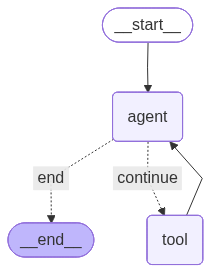

In [17]:
# Show compiled ReAct agent graph as a PNG
!pip install -q graphviz pydot
from IPython.display import Image, display

# Show the LangGraph structure visually
display(Image(graph.get_graph().draw_mermaid_png()))


## 📊 Step 14: Define a Plotting Tool (Matplotlib)

Let’s add a new tool that can **generate visual plots from text prompts**.

We support:
- **Line plots** (e.g., `y = sin(x)`, `cos(x)`, or `x²`)
- **Bar charts** (e.g., `bar chart of apples=4, bananas=7`)

The tool:
- Parses a simple description
- Generates a plot using `matplotlib`
- Encodes it as a **base64 PNG** so it can be passed in the LangGraph state

This shows how tools can output complex media, not just text!


In [18]:
#  Define the matplotlib plot tool 📊

from langchain.tools import tool
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
import base64

@tool
def plot_generator(description: str) -> str:
    """
    Generates a simple plot from a natural language description and returns a base64-encoded PNG image.
    Only supports basic line and bar plots for demo purposes.
    """
    try:
        # Very simple parsing: detect function or bar chart
        if "bar" in description.lower():
            # Example: "bar chart of apples=4, bananas=7"
            parts = description.split("of")[-1].split(",")
            labels = []
            values = []
            for p in parts:
                k, v = p.strip().split("=")
                labels.append(k.strip())
                values.append(float(v.strip()))
            fig, ax = plt.subplots()
            ax.bar(labels, values)
            ax.set_title("Bar Chart")
        else:
            # Example: "Plot y = sin(x) from -10 to 10"
            x = np.linspace(-10, 10, 500)
            if "sin" in description.lower():
                y = np.sin(x)
                label = "sin(x)"
            elif "cos" in description.lower():
                y = np.cos(x)
                label = "cos(x)"
            elif "x^2" in description.lower() or "x**2" in description.lower():
                y = x**2
                label = "x²"
            else:
                return "❌ Sorry, I only support sin, cos, or x² for now."

            fig, ax = plt.subplots()
            ax.plot(x, y, label=label)
            ax.set_title(f"Plot of {label}")
            ax.legend()

        # Save to bytes buffer
        buf = BytesIO()
        fig.savefig(buf, format='png')
        plt.close(fig)
        buf.seek(0)

        # Encode image as base64 for safe transfer
        b64 = base64.b64encode(buf.read()).decode("utf-8")
        return f"data:image/png;base64,{b64}"

    except Exception as e:
        return f"Error: {str(e)}"

print("✅ Plot generator tool defined")


✅ Plot generator tool defined


## 🧭 Step 15: Add a Tool Router for Multiple Tools

We now introduce a **tool router** — a node that:
- Inspects the LLM’s `tool_call`
- Finds the correct tool from the `tool_map`
- Invokes the tool with the right input (like `description` or `expression`)
- Adds the tool output to the agent’s state

This allows the agent to **dynamically decide which tool to use**, enabling support for multiple tools in a single workflow.

We also add `plot_generator` to the tool map so it can be routed.


In [19]:
# Add plot tool and build tool router 🧭

# 1. Add plot tool to the existing tool map
tool_map["plot_generator"] = plot_generator

# 2. Tool router node: decides which tool to invoke based on LLM intent
from langchain_core.messages import ToolCall
from langchain_core.runnables import RunnableLambda

def tool_router(state: AgentState) -> AgentState:
    last_message = state["intermediate_steps"][-1]
    
    tool_call = getattr(last_message, "tool_calls", [])[0] if hasattr(last_message, "tool_calls") else None
    if tool_call is None:
        return state

    tool_name = tool_call["name"]
    tool = tool_map.get(tool_name)

    # Fallback if tool not found
    if not tool:
        tool_msg = ToolMessage(tool_call_id=tool_call["id"], content=f"Tool '{tool_name}' not found.")
    else:
        args = tool_call.get("args", {})
        # ✅ Handle single-input tools like plot_generator
        arg_val = (
            args.get("expression")
            or args.get("description")
            or args.get("__arg1")
            or str(args)
        )
        result = tool.invoke(arg_val)
        tool_msg = ToolMessage(tool_call_id=tool_call["id"], content=result)

    return {
        **state,
        "intermediate_steps": state["intermediate_steps"] + [tool_msg],
    }

print("✅ Tool router node created and plot tool added to tool_map")

✅ Tool router node created and plot tool added to tool_map


## 🕸️ Step 16: Rebuild LangGraph with Multi-Tool Routing

We now compile a new version of the LangGraph agent that supports **multiple tools**:

- The `agent` node decides whether to use a tool or return a final answer.
- The `tool_router` node selects and invokes the appropriate tool based on the LLM's intent.
- We use `add_conditional_edges` to control the flow:
  - If a tool should be used → go to `tool_router`
  - If not → finish the graph

This structure supports **ReAct-style reasoning** across multiple tools!


In [20]:
# Rebuild LangGraph with multi-tool router 🕸️

from langgraph.graph import StateGraph, END

# Create a new StateGraph to avoid overwriting old one
builder = StateGraph(AgentState)

# Nodes
builder.add_node("agent", agent_node)           # LLM reasoning
builder.add_node("tool_router", tool_router)    # Runs appropriate tool

# Entry point
builder.set_entry_point("agent")

# Edges
builder.add_conditional_edges(
    "agent", should_continue, {
        "continue": "tool_router",
        "end": END
    }
)

builder.add_edge("tool_router", "agent")

# Compile the new graph
multi_tool_graph = builder.compile()

print("✅ Multi-tool graph compiled")

✅ Multi-tool graph compiled


## 🖼️ Step 17: Visualize the ReAct Agent Graph

LangGraph supports **visualizing your agent’s structure** as a diagram.

We use:
- `draw_mermaid_png()` to generate a flowchart
- `IPython.display.Image` to render it inside the notebook

This helps you **understand the control flow** between nodes (Agent ↔ Tool).


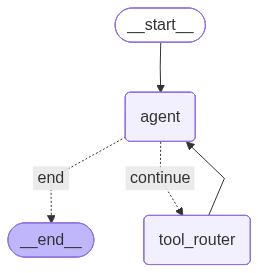

In [21]:
# Visualize multi-tool ReAct graph as a PNG

from IPython.display import Image, display

# Visualize the newly compiled LangGraph structure
display(Image(multi_tool_graph.get_graph().draw_mermaid_png()))


## 🧩 Step 18: Bind Tools to LLM for Structured Tool Calls

LangChain supports **structured tool calling**, where the LLM can call tools like functions using clear input/output.

Here we:
- Wrap our tools (`safe_calculator`, `plot_generator`) using LangChain's `Tool.from_function`
- Create a list of tools to be passed into the LLM
- This allows the agent to automatically call tools when appropriate, with arguments handled cleanly

This step is essential for enabling **tool-awareness** in models like `gpt-4o`.


In [22]:
# Bind tools to LLM (OpenAI) for structured tool calls

from langchain_core.tools import StructuredTool
from langchain_openai import ChatOpenAI

def safe_calculator(expression: str) -> float:
    """Safely evaluates simple math expressions like '2 + 2 * sqrt(9)'."""
    ...

def plot_generator(prompt: str) -> str:
    """Plots mathematical functions or bar charts from natural language prompts."""
    ...

calculator_tool = StructuredTool.from_function(
    func=safe_calculator,
    name="safe_calculator",
    description="Evaluates math expressions like '2 + sqrt(9)'",
)

plot_tool = StructuredTool.from_function(
    func=plot_generator,
    name="plot_generator",
    description="Plots mathematical functions or bar charts from natural language prompts.",
)

tools = [calculator_tool, plot_tool]
llm = ChatOpenAI(model="gpt-4.1-mini")
llm_with_tools = llm.bind_tools(tools)


## 🔌 Step 19: Connect the Right LLM with Tool Support

We now connect the language model and bind the tools:

- If you're using **OpenAI**, we bind the tools using `.bind_tools()` — enabling structured tool use.
- If you're using **NVIDIA NIM**, we fall back to basic LLM behavior (since structured tools aren't supported yet).
- If no valid API key is found, we raise an error to help the user debug.

This step ensures the agent knows how to call the tools you've defined!


In [23]:
# Bind tools to LLM if OpenAI is used
if os.getenv("OPENAI_API_KEY"):
    llm_with_tools = ChatOpenAI(model="gpt-4o-mini").bind_tools(tools)
    print("✅ Using OpenAI with structured tool-calling")
elif os.getenv("NVIDIA_API_KEY") and ChatNVIDIA:
    llm_with_tools = ChatNVIDIA(model="chat", temperature=0.7)  # no tool binding supported
    print("⚠️ NVIDIA NIM fallback — structured tool calls not supported")
else:
    raise RuntimeError("❌ Please set either OPENAI_API_KEY or NVIDIA_API_KEY")


✅ Using OpenAI with structured tool-calling


## 🧠 Step 20: Update the Agent Node for Tool-Calling Support

We now update the `agent_node` so it can:

- Take prior tool results (in `intermediate_steps`)
- Use the LLM bound with tools (`llm_with_tools`)
- Decide either to answer directly or call a tool

This is essential for ReAct-style agents, where the model reasons, acts (calls tools), and reasons again.


In [24]:
# Updated agent node with tool-calling support

def agent_node(state: AgentState) -> AgentState:
    messages = [HumanMessage(content=state["user_input"])] + state["intermediate_steps"]
    response = llm_with_tools.invoke(messages)
    return {
        "user_input": state["user_input"],
        "agent_output": response.content,
        "intermediate_steps": state["intermediate_steps"] + [response],
    }



## 🔄 Step 21: Recompile LangGraph with Tool-Aware Agent and Router

Now that our agent and tool logic are updated, we rebuild the LangGraph:

- `agent`: decides what to do (respond or call a tool)
- `tool_router`: figures out which tool to run and executes it

We then recompile the `multi_tool_graph`, which supports **structured tool calls** in a ReAct loop. This is our full-fledged multi-tool agent!


In [25]:
# Recompile LangGraph using tool router + tool-aware agent

from langgraph.graph import StateGraph, END

builder = StateGraph(AgentState)
builder.add_node("agent", agent_node)
builder.add_node("tool_router", tool_router)

builder.set_entry_point("agent")
builder.add_conditional_edges("agent", should_continue, {"continue": "tool_router", "end": END})
builder.add_edge("tool_router", "agent")

multi_tool_graph = builder.compile()



## 🧪 Step 22: Run a Test Prompt to Trigger the Plot Tool

Let’s test our agent with a prompt that should invoke the `plot_generator` tool.

We provide a natural language instruction:  
**"Use a tool to plot y = sin(x) from -10 to 10."**

The agent will:
1. Interpret the prompt
2. Decide to use the plot tool
3. Call the appropriate function
4. Return the generated image as output


In [26]:
# # ✅ Run a test prompt that should trigger the plot tool and display the output

# Commented out to avoid long execution times during testing

# from IPython.display import Image, display
# import base64

# plot_prompt = "Use a tool to plot y = sin(x) from -10 to 10."

# state = {
#     "user_input": plot_prompt,
#     "agent_output": None,
#     "intermediate_steps": [],
# }

# # ⏳ Run the agent
# final_state = multi_tool_graph.invoke(state)

## 🔍 Step 23: Inspect the Agent's Reasoning Trace

Let’s print out the **full reasoning trace** of the agent to understand:

- What the LLM predicted
- Which tool was called (if any)
- What each tool returned

This helps us **debug** and **verify** the decision-making flow.


In [27]:
# 🧠 Show full reasoning trace
print("🧠 Reasoning Trace:\n")
for step in final_state["intermediate_steps"]:
    if hasattr(step, "type") and hasattr(step, "content"):
        print(f"{step.type.upper()} → {step.content[:250]}{'...' if len(step.content) > 250 else ''}\n")
    else:
        print(f"❓ Unknown step: {step}\n")

🧠 Reasoning Trace:

AI → To solve the expression \( (10 + 5) \times \sqrt{16} \), follow these steps:

1. **Calculate the sum**: 
   \[ 
   10 + 5 = 15 
   \]

2. **Calculate the square root**: 
   \[ 
   \sqrt{16} = 4 
   \]

3. **Multiply the results**: 
   \[ 
   15 \time...



## 🖼️ Step 24: Display the Generated Plot (If Available)

The agent may return a **base64-encoded PNG image** from the `plot_generator` tool.

In this step:
- We check the agent's tool output for an image
- If found, we decode and display it
- If not, we show a warning

This allows us to **visualize plots** created by the agent.
In case of network issues or tool-call failures try re-running the cell, or the cell below

In [28]:
# 🖼 Decode and display the base64 PNG if present
image_found = False
for step in final_state["intermediate_steps"]:
    if isinstance(step, ToolMessage) and step.content.startswith("data:image/png;base64,"):
        print("✅ Plot generated! Displaying image...")
        b64_data = step.content.split(",")[1]
        image_bytes = base64.b64decode(b64_data)
        display(Image(data=image_bytes))
        image_found = True
        break

if not image_found:
    print("❌ No image found – agent may not have called the plot_generator tool.")

❌ No image found – agent may not have called the plot_generator tool.


## 🧪 Step 25: Directly Test the Plot Tool (Fallback)

In case of network issues or tool-call failures, you can test the `plot_generator` tool directly.

This cell:
- Calls the `plot_generator` function with a sample input
- Decodes and displays the plot if valid
- Prints an error message otherwise

Useful for debugging or offline demo purposes.


In [29]:
from IPython.display import Image, display
import base64

# Test plot_generator directly
b64_result = plot_generator("Plot y = sin(x) from -10 to 10.")

# Check if output is valid
if isinstance(b64_result, str) and b64_result.startswith("data:image/png;base64,"):
    image_data = base64.b64decode(b64_result.split(",")[1])
    display(Image(data=image_data))
else:
    print("❌ Plot tool did not return a base64 image:")
    print(b64_result)


❌ Plot tool did not return a base64 image:
None


## 🌍 Step 26: Add a Translation Tool

In this step, we define a **language translation tool** that allows the agent to translate English text into other languages using the LLM.

Key features:
- Input format: `"Translate to [language]: [text]"`
- Uses the LLM to perform the actual translation
- Supports natural phrasing and multi-language output

This tool expands the agent's capabilities into **multilingual tasks**.


In [30]:
# 🈯 Add translation tool

from langchain.tools import tool

@tool
def translate_text(input: str) -> str:
    """
    Translates English text to a target language.
    Input format: "Translate to [language]: [text]"
    Example: "Translate to German: How are you?"
    """
    try:
        if ":" not in input:
            return "⚠️ Please use format: 'Translate to [language]: [text]'"
        
        lang, text = input.split(":", 1)
        target_language = lang.strip().replace("Translate to", "").strip()
        text_to_translate = text.strip()
        
        prompt = f"Translate the following text to {target_language}:\n{text_to_translate}"
        response = llm.invoke(prompt)
        return response.content
    except Exception as e:
        return f"Error: {e}"

print("✅ Translation tool defined")


✅ Translation tool defined


## 🧩 Step 27: Register the Translation Tool with the Agent

Now that we’ve defined the translation tool, we need to:

- ✅ Add it to the `tool_map` so the agent can route tool calls to it
- 🔧 Wrap it as a `Tool` object compatible with LangChain
- 🛠️ Rebuild the `tools` list to include all available tools (calculator, plot, translation)
- 🤖 Re-bind the LLM to the updated toolset

This ensures the agent can now **recognize and invoke** the new translation tool when prompted.


In [31]:
from langchain_openai import ChatOpenAI

# translate_text is already a StructuredTool (e.g. via @tool),
# so we treat it as a tool directly.

tool_map["translate_text"] = translate_text  # optional, if you use this mapping elsewhere

# Rebuild tool list with 3 tools
tools = [calculator_tool, plot_tool, translate_text]

llm_with_tools = ChatOpenAI(model="gpt-4o-mini").bind_tools(tools)


## 🧠 Step 28: Update the Agent Node to Use Structured Tool-Calling

This updated `agent_node`:

- Uses the **tool-aware LLM** (`llm_with_tools`)
- Passes the user input and prior tool messages as context
- Appends the model’s response (which may include tool calls) to the intermediate steps

This enables the agent to **reason, decide**, and **call tools in a structured way**, based on the current conversation state.


In [32]:
def agent_node(state: AgentState) -> AgentState:
    messages = [HumanMessage(content=state["user_input"])] + state["intermediate_steps"]
    response = llm_with_tools.invoke(messages)
    return {
        "user_input": state["user_input"],
        "agent_output": response.content,
        "intermediate_steps": state["intermediate_steps"] + [response],
    }


## 🧪 Step 29: Test the Translation Tool

Let’s test our updated agent with a real input:
> “Translate to Spanish: The patient is stable and recovering well.”

The agent should:
1. Parse the input
2. Use the `translate_text` tool
3. Return the translated sentence

We'll also print the full **reasoning trace** to verify how the agent made decisions along the way.


In [33]:
# Run agent with a translation task
state = {
    "user_input": "Translate to Spanish: The patient is stable and recovering well.",
    "agent_output": None,
    "intermediate_steps": [],
}

final_state = multi_tool_graph.invoke(state)

# Show steps
print("🧠 Agent trace:\n")
for step in final_state["intermediate_steps"]:
    print(f"{step.type.upper()} → {step.content[:250]}{'...' if len(step.content) > 250 else ''}\n")


🧠 Agent trace:

AI → 

TOOL → {'input': 'Traducir al español: El paciente está estable y se está recuperando bien.'}

AI → The translation to Spanish is: "El paciente está estable y se está recuperando bien."



## 📥 Step 30: Define a Tool to Download PDFs

We define a new tool called `download_pdf` that:

- Accepts a URL as input
- Downloads the file from the internet
- Saves it locally as `/tmp/langgraph_doc.pdf`
- Returns the local file path (used by other tools later)

This is the **first step** in our PDF question-answering pipeline.


In [34]:
# 📥 Tool: download a PDF to local disk
from langchain.tools import tool
import requests

@tool
def download_pdf(url: str) -> str:
    """
    Downloads a PDF from the given URL and saves it to /tmp/langgraph_doc.pdf.
    Returns the local file path.
    """
    try:
        response = requests.get(url)
        if response.status_code != 200:
            return f"Failed to download: {response.status_code}"
        path = "/tmp/langgraph_doc.pdf"
        with open(path, "wb") as f:
            f.write(response.content)
        return path
    except Exception as e:
        return f"Error: {str(e)}"

print("✅ PDF download tool defined")


✅ PDF download tool defined


In [35]:
# !pip install -q pymupdf frontend

## 📄 Step 31: Extract Text from a Downloaded PDF

Next, we define the `extract_text_from_pdf` tool, which:

- Opens the local PDF using `PyMuPDF` (`fitz`)
- Extracts text from all pages
- Returns the first 4000 characters to stay within LLM limits

This tool prepares the raw text content from the PDF for further analysis.


In [36]:
# 📄 Tool: extract text from PDF using PyMuPDF
import pymupdf  # PyMuPDF

@tool
def extract_text_from_pdf(path: str) -> str:
    """
    Extracts text from a PDF file located at the given path.
    Returns the raw text.
    """
    try:
        doc = pymupdf.open(path)
        text = "\n".join(page.get_text() for page in doc)
        doc.close()
        return text[:4000]  # limit length for LLM input
    except Exception as e:
        return f"Error: {str(e)}"

print("✅ PDF text extractor tool defined")


✅ PDF text extractor tool defined


## ❓ Step 32: Define a Question Answering Tool for PDF Content

The `answer_question_from_text` tool takes two inputs:

- A **context** (text extracted from a PDF)
- A **question** related to that context

Both are combined in a single string using this format:  
`context: ... ||| question: ...`

The tool passes this prompt to the LLM to generate a relevant answer.  
This completes the core logic for PDF-based question answering!


In [37]:
@tool
def answer_question_from_text(input: str) -> str:
    """
    Answers a question using the context provided.
    Input should be: 'context: ... ||| question: ...'
    """
    try:
        if "|||" not in input:
            return "Please format input as 'context: ... ||| question: ...'"
        context, question = input.split("|||", 1)
        context = context.replace("context:", "").strip()
        question = question.replace("question:", "").strip()
        prompt = f"Use the context below to answer the question.\n\nContext:\n{context}\n\nQuestion:\n{question}"
        return llm.invoke(prompt).content
    except Exception as e:
        return f"Error: {str(e)}"

print("✅ PDF QA tool defined")


✅ PDF QA tool defined


## 🔗 Step 33: Register and Bind PDF Tools to the Agent

We now:

- Add our three new PDF tools (`download_pdf`, `extract_text_from_pdf`, `answer_question_from_text`) to the `tool_map`
- Wrap them as LangChain-compatible `Tool` objects with descriptions
- Rebind the tools to the LLM using `bind_tools()`

This enables the agent to:
- Download a PDF from a link
- Extract its content
- Answer questions from that content

The agent is now fully equipped for document-based reasoning!


In [38]:
tool_map.update({
    download_pdf.name: download_pdf,
    extract_text_from_pdf.name: extract_text_from_pdf,
    answer_question_from_text.name: answer_question_from_text,
})

pdf_tools = [
    download_pdf,
    extract_text_from_pdf,
    answer_question_from_text,
]

# Re-bind tools
tools = tools + pdf_tools
llm_with_tools = ChatOpenAI(model="gpt-4o-mini").bind_tools(tools)


## 🧠 Step 34: Define Agent State for PDF Workflow

To handle complex document interactions, we define a new `PDFAgentState` with:

- `user_input`: the original prompt (can be a URL or a question)
- `agent_output`: the final answer, once reasoning is complete
- `intermediate_steps`: a log of all LLM messages and tool calls (toolchain trace)

This separate state keeps our PDF-specific reasoning organized and easy to trace.


In [39]:
# 📄 Agent state for the PDF flow
from typing import TypedDict, Annotated, Optional, List, Union
from langchain_core.messages import AIMessage, ToolMessage

class PDFAgentState(TypedDict):
    user_input: Annotated[str, "User's query or PDF link"]
    agent_output: Annotated[Optional[str], "Final answer"]
    intermediate_steps: Annotated[List[Union[AIMessage, ToolMessage]], "Toolchain trace"]


## 🧠 Step 35: Define the PDF Agent Node (LLM Reasoning)

This is the thinking step of our PDF agent.

It:
- Collects the user’s input and all intermediate steps (previous messages, tool outputs)
- Invokes the LLM with this full context
- Stores the LLM’s response (could be a final answer or a tool call)

This is where the agent decides what to do next based on the PDF workflow.


In [40]:
# Agent node: Think and optionally call tools
def pdf_agent_node(state: PDFAgentState) -> PDFAgentState:
    messages = [HumanMessage(content=state["user_input"])] + state["intermediate_steps"]
    response = llm_with_tools.invoke(messages)
    return {
        "user_input": state["user_input"],
        "agent_output": response.content,
        "intermediate_steps": state["intermediate_steps"] + [response],
    }


## 🧰 Step 36: Tool Router for the PDF Agent

This node executes any tools the LLM decides to use.

It:
- Looks at the most recent tool call from the LLM
- Finds the correct tool from the `tool_map`
- Invokes the tool with the appropriate argument
- Returns the output as a `ToolMessage`, which will be used in the next reasoning step

This makes the PDF agent capable of chaining actions like downloading a PDF, extracting its text, and answering questions on it.


In [41]:
def pdf_tool_router(state: PDFAgentState) -> PDFAgentState:
    last_message = state["intermediate_steps"][-1]
    tool_call = getattr(last_message, "tool_calls", [])[0] if hasattr(last_message, "tool_calls") else None
    if tool_call is None:
        return state

    tool_name = tool_call["name"]
    tool = tool_map.get(tool_name)
    if not tool:
        tool_msg = ToolMessage(tool_call_id=tool_call["id"], content=f"Tool '{tool_name}' not found.")
    else:
        args = tool_call.get("args", {})
        arg_val = (
            args.get("expression")
            or args.get("description")
            or args.get("path")
            or args.get("url")
            or args.get("__arg1")
            or str(args)
        )
        result = tool.invoke(arg_val)
        tool_msg = ToolMessage(tool_call_id=tool_call["id"], content=result)

    return {
        **state,
        "intermediate_steps": state["intermediate_steps"] + [tool_msg],
    }


## 🗺️ Step 37: Build the LangGraph for the PDF Agent

Now we build the LangGraph that powers the full PDF agent.

This graph includes:
- An **agent node** for reasoning and deciding what to do
- A **tool router node** that runs tools like `download_pdf`, `extract_text_from_pdf`, or `answer_question_from_text`
- A loop that allows the agent to use multiple tools in sequence

This structure enables multi-step reasoning and tool usage for working with PDFs.


In [42]:
# Build the PDF LangGraph
from langgraph.graph import StateGraph, END

pdf_builder = StateGraph(PDFAgentState)
pdf_builder.add_node("agent", pdf_agent_node)
pdf_builder.add_node("tool_router", pdf_tool_router)
pdf_builder.set_entry_point("agent")
pdf_builder.add_conditional_edges("agent", should_continue, {"continue": "tool_router", "end": END})
pdf_builder.add_edge("tool_router", "agent")

pdf_graph = pdf_builder.compile()

print("✅ PDF-aware LangGraph agent compiled")


✅ PDF-aware LangGraph agent compiled


## 🧪 Step 38: Test the PDF Agent on a Full Prompt

Let’s run the full pipeline using a real prompt!

This example tells the agent to:
1. Download a real paper from arXiv
2. Extract its text
3. Store everything in memory (no embeddings yet)

The graph will:
- Show how the agent reasons
- Call tools step-by-step
- Show the intermediate outputs

You should see a reasoning trace with clear tool use.


In [43]:
# Test: Run agent on a full prompt
test_input = {
    "user_input": "Download this: https://arxiv.org/pdf/1706.03762.pdf",
    "agent_output": None,
    "intermediate_steps": [],
}

final_state = pdf_graph.invoke(test_input)

# Show trace
for step in final_state["intermediate_steps"]:
    print(f"{step.type.upper()} → {step.content[:300]}{'...' if len(step.content) > 300 else ''}")


AI → 
TOOL → /tmp/langgraph_doc.pdf
AI → The PDF has been successfully downloaded and saved to the path `/tmp/langgraph_doc.pdf`.


## 🔁 Step 39: Continue the Conversation with Memory

We now run **multi-step interactions** with the PDF agent using memory:

### Step 1 – Extract Text
We ask the agent to extract the full text from the downloaded PDF.  
It will use the previous `download_pdf` tool call as context and continue from there.

### Step 2 – Ask a Question
Next, we ask a question about the abstract of the paper — this triggers reasoning and likely another tool call using the extracted text.

### 🧠 Why This Matters
LangGraph keeps memory (`intermediate_steps`) across turns. This lets the agent **chain tools together intelligently**, just like a human would.

You’ll see the full reasoning trace printed below.


In [44]:
# 🧠 Step 1: Extract the text
state = {
    "user_input": "Extract text from the PDF.",
    "agent_output": None,
    "intermediate_steps": final_state["intermediate_steps"],  # continue the same memory
}

state = pdf_graph.invoke(state)

# 🧠 Step 2: Ask a question
state = {
    "user_input": "Based on the PDF, what is the main idea in the abstract?",
    "agent_output": None,
    "intermediate_steps": state["intermediate_steps"],
}

final_state = pdf_graph.invoke(state)

# 🔍 See full trace
for step in final_state["intermediate_steps"]:
    print(f"{step.type.upper()} → {step.content[:500]}{'...' if len(step.content) > 500 else ''}")


AI → 
TOOL → /tmp/langgraph_doc.pdf
AI → The PDF has been successfully downloaded and saved to the path `/tmp/langgraph_doc.pdf`.
AI → 
TOOL → Provided proper attribution is provided, Google hereby grants permission to
reproduce the tables and figures in this paper solely for use in journalistic or
scholarly works.
Attention Is All You Need
Ashish Vaswani∗
Google Brain
avaswani@google.com
Noam Shazeer∗
Google Brain
noam@google.com
Niki Parmar∗
Google Research
nikip@google.com
Jakob Uszkoreit∗
Google Research
usz@google.com
Llion Jones∗
Google Research
llion@google.com
Aidan N. Gomez∗†
University of Toronto
aidan@cs.toronto.edu
Łukasz K...
AI → Here is the extracted text from the PDF:

---

**Provided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.**

**Attention Is All You Need**

Ashish Vaswani∗  
Google Brain  
avaswani@google.com

Noam Shazeer∗  
Google Brain  
noam@g

## 📄 Step 40: Extract and Store Text from PDF (Tiny In-Memory DB)

We now define a tool that:
- 📥 Takes a local PDF path (e.g., `/tmp/langgraph_doc.pdf`)
- 📄 Extracts all text using `PyMuPDF` (`fitz`)
- 🧠 Stores the text in a Python dictionary called `pdf_text_store`

This dictionary acts as a **tiny in-memory document store** for downstream tools to access.

Why is this useful?
- It decouples extraction and reasoning
- Allows us to **reuse extracted text** later (for Q&A, summarization, etc.)
- Keeps things fast and simple without using a full vector database

The tool returns a success message after storing the text.


In [45]:
# In-memory PDF store (acts like a tiny DB)
pdf_text_store = {}

@tool
def extract_text_from_pdf(path: str) -> str:
    """
    Extracts and stores text from a PDF located at the given path.
    """
    import fitz  # PyMuPDF
    try:
        doc = fitz.open(path)
        text = "\n".join(page.get_text() for page in doc)
        pdf_text_store[path] = text  # ✅ Save it in memory
        return f"✅ Extracted and stored text from {path}."
    except Exception as e:
        return f"❌ Failed to extract PDF text: {str(e)}"


## ❓ Step 41: Ask Questions About Stored PDF Content

This tool lets the agent **answer questions about a previously extracted PDF**.

### 🔍 How It Works:
- The user provides: `<pdf_path> || <question>`
- The tool checks if the PDF’s text is already in memory
- If found, it truncates the text (for safety) and creates a prompt like:
  ```
  Answer the question based on this PDF content:
  ...
  Question: [your question]
  ```
- The LLM then answers based on this extracted context

### 💡 Why This Matters:
- Makes it possible to **ask multiple questions** after one-time extraction
- Keeps the reasoning **stateless for the user** but **stateful under the hood**
- Mimics how an agent would read and refer to a document intelligently


In [46]:
@tool
def ask_from_stored_pdf(path_and_question: str) -> str:
    """
    Answers a question about a PDF already processed (stored in memory).
    Input format: "<pdf_path> || <your question>"
    """
    try:
        path, question = path_and_question.split("||", 1)
        path = path.strip()
        question = question.strip()
        if path not in pdf_text_store:
            return "❌ PDF not found in memory. Please extract it first."

        context = pdf_text_store[path][:4000]  # truncate for safety
        prompt = f"""Answer the question based on the following PDF content:

--- PDF TEXT START ---
{context}
--- PDF TEXT END ---

Question: {question}"""
        response = llm.invoke(prompt)
        return response.content
    except Exception as e:
        return f"❌ Error answering question: {str(e)}"


## ✅ Step 42: Ask Questions Using the Stored PDF (In-Memory RAG)

We now test the full pipeline:
- The agent uses the `ask_from_stored_pdf` tool
- The question is: **“What is the Transformer model?”**
- The context is pulled from previously extracted PDF text (in memory)

### 🧠 What’s Happening:
- The tool fetches the text for `/tmp/langgraph_doc.pdf`
- It sends the context + question to the LLM
- The LLM answers using **retrieved content**, similar to how Retrieval-Augmented Generation (RAG) works

This proves our agent:
- ✅ Downloads and parses PDFs
- ✅ Stores and reuses document context
- ✅ Answers questions intelligently using tools and memory

🎉 You've now built a working agentic RAG system with LangGraph!


In [47]:
# ✅ Ask a question using the stored PDF
tool_map["ask_from_stored_pdf"] = ask_from_stored_pdf
user_input = "Please use the tool to answer from /tmp/langgraph_doc.pdf || What is the Transformer model?"

# Set up initial state
state = {
    "user_input": user_input,
    "agent_output": None,
    "intermediate_steps": [],
}

# Run the multi-tool LangGraph
final_state = multi_tool_graph.invoke(state)

# Reasoning trace
print("🧠 Reasoning Trace:\n")
for step in final_state["intermediate_steps"]:
    print(f"{step.type.upper()} → {step.content[:250]}{'...' if len(step.content) > 250 else ''}\n")

# Final output
print("✅ Final Answer:", final_state["agent_output"])


🧠 Reasoning Trace:

AI → 

TOOL → Error: no such file: '{'path': '/tmp/langgraph_doc.pdf'}'

AI → It appears that the PDF file is not available for extraction. Could you please provide the content of the PDF or re-upload it so I can assist you with your question about the Transformer model?

✅ Final Answer: It appears that the PDF file is not available for extraction. Could you please provide the content of the PDF or re-upload it so I can assist you with your question about the Transformer model?


## 🎨 Step 43: Add a DALL·E Image Generation Tool

Let’s give our agent the ability to generate **images from text prompts** using OpenAI’s **DALL·E 3** model!

### 🧰 What This Tool Does:
- Takes a prompt like `"A watercolor painting of a futuristic city"`
- Calls `OpenAI().images.generate()` with `dall-e-3`
- Returns a base64-encoded PNG image
- If something goes wrong, it returns a helpful error message

### 📦 Requirements:
Make sure your OpenAI account has access to image generation and DALL·E 3.

### ⚙️ Why This Is Cool:
- Shows how **language + vision** can work together
- Gives users a **visual result** from their imagination
- Great for **creativity, storytelling, design, or moodboards**


In [48]:
from typing import TypedDict, List, Union
from langchain_core.messages import HumanMessage, ToolMessage
from langchain_core.runnables import RunnableConfig
from langgraph.graph import END, StateGraph
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
import base64
from openai import OpenAI
from IPython.display import Image, display

# === 1. Define State ===
class AgentState(TypedDict):
    user_input: str
    agent_output: Union[str, None]
    intermediate_steps: List[Union[ToolMessage]]


# === 2. Define Tool ===
@tool
def generate_image(prompt: str) -> str:
    """Generates an image using DALL·E from a text prompt."""
    client = OpenAI()
    try:
        response = client.images.generate(
            model="dall-e-3",
            prompt=prompt,
            n=1,
            size="1024x1024",
            response_format="b64_json",
        )
        b64_img = response.data[0].b64_json
        return b64_img
    except Exception as e:
        return f"❌ Image generation failed: {str(e)}"


## 🧠 Step 44: Bind the Image Tool and Define the Agent Node

Now we make the agent "smart" by:

1. **Binding tools** to the language model:
   - This allows the LLM to call `generate_image()` using structured tool calls
   - We pass the tool as a list to `bind_tools()`

2. **Creating the agent node**:
   - This node takes user input and sends it to the LLM
   - If the LLM wants to use a tool, it adds a tool call to the response
   - We store the response in the `intermediate_steps` for reasoning

This is the thinking step — next, we’ll handle tool execution.


In [49]:
# === 3. Set Up Tool Bindings ===
tool_map = {"generate_image": generate_image}
llm_with_tools = ChatOpenAI(model="gpt-4", temperature=0).bind_tools(list(tool_map.values()))


# === 4. Define Agent Node ===
def agent_node(state: AgentState) -> AgentState:
    # Minimal context: only user input
    messages = [HumanMessage(content=state["user_input"])]
    response = llm_with_tools.invoke(messages)
    return {
        "user_input": state["user_input"],
        "agent_output": response.content,
        "intermediate_steps": [response] if hasattr(response, "tool_calls") else [],
    }

## 🛠️ Step 45: Define the Tool Execution Node

Once the agent decides to use a tool (like `generate_image`), we need a node that:

1. **Looks at the last message** from the agent (which may contain tool calls)
2. **Extracts the tool name and arguments** from the tool call
3. **Runs the correct tool** using `.invoke(...)`
4. **Returns a new tool message** with the output, so the agent can use it next time

This node is like the **action executor** — it performs the task the agent requested.

In our case, it only handles `generate_image`, but you can extend this to support many tools.


In [50]:
# === 5. Define Tool Node ===
def tool_node(state: AgentState) -> AgentState:
    last_message = state["intermediate_steps"][-1]
    if hasattr(last_message, "tool_calls"):
        for tool_call in last_message.tool_calls:
            if tool_call["name"] == "generate_image":
                result = generate_image.invoke(tool_call["args"])
                return {
                    "user_input": state["user_input"],
                    "agent_output": None,
                    "intermediate_steps": [
                        ToolMessage(tool_call_id=tool_call["id"], content=result)
                    ],
                }
    return state


## 🧩 Step 46: Build the LangGraph with Agent + Tool

Now we put everything together using `StateGraph`:

- **Nodes**:
  - `agent`: thinks and decides whether to call a tool
  - `tools`: executes the requested tool (like generating an image)

- **Flow**:
  - The graph starts at `agent`
  - If the agent calls a tool, we route to `tools`
  - Once the tool is done, the graph ends

This is the full loop: *Think → Act → Done*.

Once compiled, you can invoke the graph with a prompt like “Generate a watercolor image of a futuristic city.”


In [51]:
# === 6. Define Graph ===
graph = StateGraph(AgentState)
graph.add_node("agent", agent_node)
graph.add_node("tools", tool_node)
graph.set_entry_point("agent")
graph.add_edge("agent", "tools")
graph.add_edge("tools", END)
image_graph = graph.compile()

## 🧪 Step 47: Test the Image Agent and Display Output

Now let’s run the full LangGraph agent!

1. We pass a prompt like `"Generate a watercolor painting of a futuristic city"` to the agent.
2. The agent chooses to use the `generate_image` tool.
3. The tool generates a base64-encoded image.
4. We decode and display the image inline using Python.

🎨 This demonstrates an end-to-end *ReAct agent* with image generation!


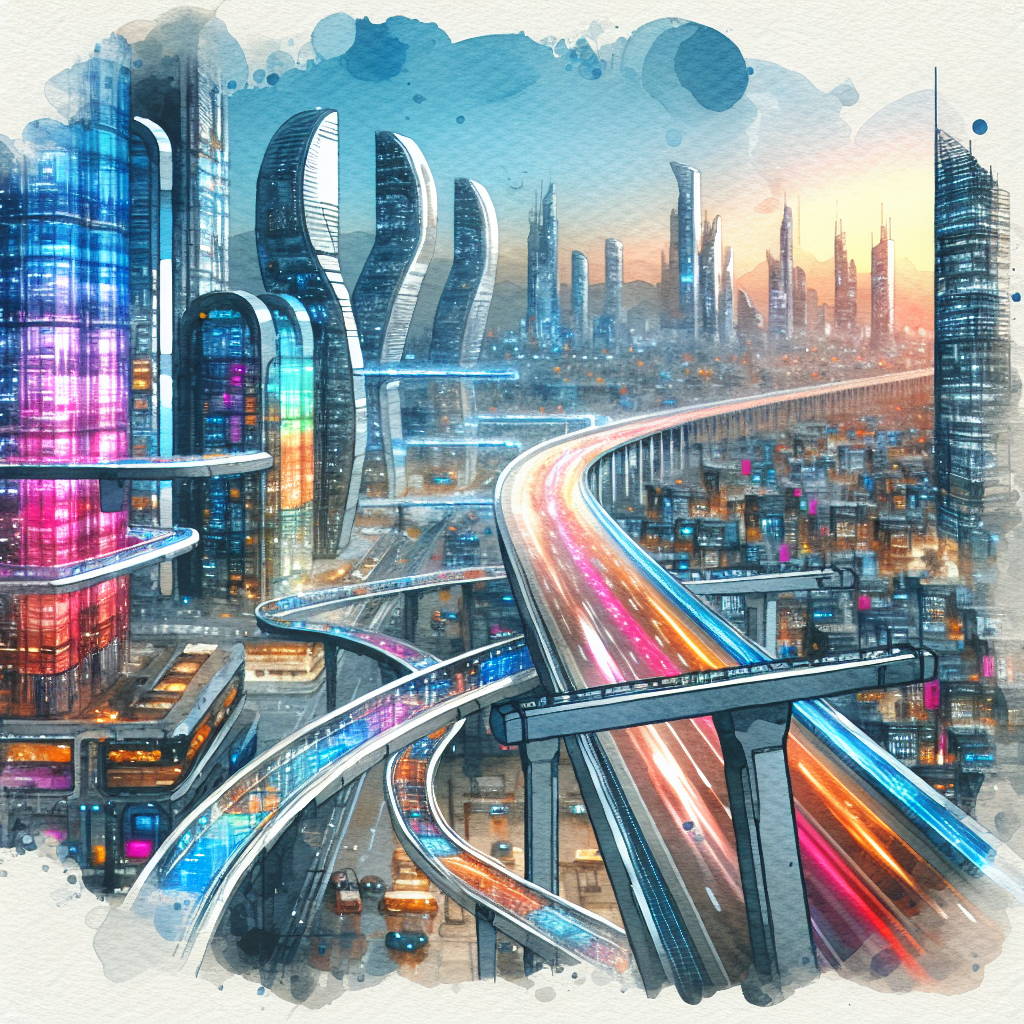

In [52]:
# === 7. Run Test ===
test_state = {
    "user_input": "Generate a watercolor painting of a futuristic city.",
    "agent_output": None,
    "intermediate_steps": [],
}

result = image_graph.invoke(test_state)

# === 8. Display Image ===
for step in result["intermediate_steps"]:
    if isinstance(step, ToolMessage) and isinstance(step.content, str) and not step.content.startswith("❌"):
        img_bytes = base64.b64decode(step.content)
        display(Image(data=img_bytes))
        break
    elif "❌" in step.content:
        print(step.content)


# Thank you